# Project Summary

## Goals:
Find out to what extend deep learning models are suited to evaluate gas absorbtion spectra, especialy in higher concentrations where too much ligt gets absorbt.

### Collecting/generating Data with simulation/digital created dataset:

generated a dataset containing spectrums as features and the concentration as labels. Taking the concentration in floating points made it hard to interpret the error and datasets containing just a few thousand samples showed to be too small to achieve low loss. 
So the final dataset containes 100k samples containing of spectrums as features and the concentration in ppm as lables.

[click to view code](https://github.com/VincentBrunner/spectrum-regression-/blob/main/Dataset%20Generation.ipynb)

### Data preprocessing:

The main preprocessing methods include:
* cutting the ramps of the spectrums
* normalizing the spectrums by using scypi butter_lowpass filter and dividing by the ramp

All the mentioned methods lead to the model picking up patterns faster, even tho not allways better.
#### before preprocessing:

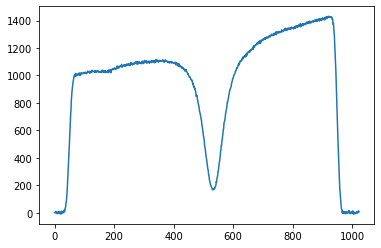

#### after preprocessing:

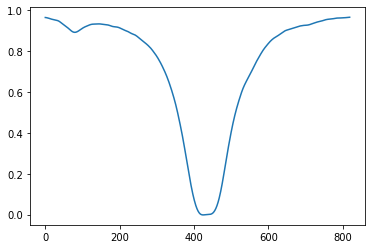

[click to view code](https://github.com/VincentBrunner/spectrum-regression-/blob/main/Data%20exploration%20and%20preprocessing.ipynb)

### Modeling process:
[code to sample model code](https://github.com/VincentBrunner/spectrum-regression-/blob/main/sample%20model.ipynb)
#### model, modelarchitecture and loss function choice:
usage of deep neural network: concidering the features containing of just one array each and the project being about a regression task a deep neural network is the most straight foreward choice. Of cause other model types could be tested in the future but for this project we'll concentrate on deep neural networks.

model architecture choice/test results: comparing diffrent model architectures with each other a model using a rather large amount of neurons per layer and consisting of multiple deep layers showed the best results. Intrestingly using a model containing fewer neurons on the fist and last layers than on the middle seemed to perform a hint better than the conventional big to small architecture. More to how the model changed with time in the hyperparameter tuning section.

loss function choice: the loss function used in the current model is the mean squared error, even tho there were some problems acurring with this type off loss, but more in the hyperparameter tuning section.

#### hyperparameter tuning:
In this project the hyperparametertuning process took many, many iterations so here I'll just describe the tendencys that could be found in the process. From time to time the model was tested on a 2000 samples large test dataset to calculate and analyse the percential deviations even further. In general the model tend to perform much better on higher concentrations than on small ones, after a few runs the model achieved mean deviations under 1% for the upper 75% of the concentrations. With more and more testing and error analasis a pattern became clear: In generall models of 130 mio + trainable parameters worked the best for reducing the amount and extremity of the outliers in the small concentrations. Intrestingly in the last runns another pattern became visible: extreamly lowering learning rate from a allready small point further down did worsen the mse a bit but extreamly positively influenced the mean absolute percentage error I used for monetoring the learning process. What this meant could be seen in another error analysis where I compared models from small to large trained with learning rates from large to small.

### Current Error analisation:

[example code](https://github.com/VincentBrunner/spectrum-regression-/blob/main/Model%202%20testing.ipynb)

To test the performance of the model based on the percential deviation, it was tested on 2000 new created spectrums:

#### visualisation:

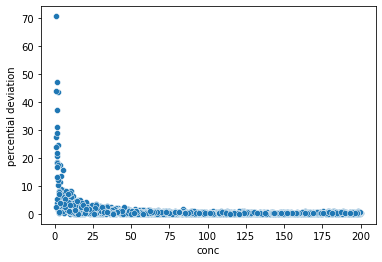

#### Interpretation:

The deviation is low in the higher concentrations, gets nearly exponentialy higher with lower concentrations. No matter what error I used and how low the error got, each model performed similar to the plot above (pattern wise).
In further experiments putting a higher weight on the lower concentrations or increasing the size of the whole dataset could deal with that problem. 
For now ther model still performs great with higher concentrations so it could be put to use there.